# Homework 5: Support Vector Machines (SVM)

In this homework we will implement the Suport Vector Machine algorithm using Gradient Descent.

We use as reference the chapter 15 of Understanding Machine Learning.

This exercise can be done in pairs. Please, leave all of your answers on this notebook, which will be the only file you will have to deliver.

Copy this notebook and insert the corresponding names on the file.

**If you have any questions feel free to send an email to:**

### ibrahim.djemai@telecom-sudparis.eu 

### breno.skuk@gmail.com

Lais Isabelle Alves dos Santos

Louis Chanaron

# Part 1: From theory to algorithm

<img src="https://vitalflux.com/wp-content/uploads/2020/07/Screenshot-2020-07-07-at-3.44.38-PM.png">

**Figure 1:** Visualization in $\mathbb{R^2}$ of a hyperplane $W$, margin and samples. 

<img src="https://www.holehouse.org/mlclass/12_Support_Vector_Machines_files/Image%20[12].png">

**Figure 2:**  Notice that the epigraph (set of points above the function) of the cost  is convex. This would not hold for $l_{0-1}$.

## Support Vector Machines (SVM) in a nutshell

The SVM algorithmic paradigm performs a search for “large margin” separators. Roughly speaking, a halfspace separates a training set with a large margin if all the examples are not only on the correct side of the separating hyperplane but also far away from it. Figure 1 offers an intuitive understanding of the concept of margin.


The objective of the SVM algorithm is thus to find not only a hyperplane that separates the data, but to impose the condition that it maximizes the distance between the points of both labels and the hyperplane. 

To solve this learning problem, we can write a regularized loss function that will include the notion of "distance to a margin". This Loss function can be shown to follow certain conditions, such as convexity, and thus, can be shown to be learnable trough Gradient Descent. 

The development of such a loss function and associated proofs are thoroughly discussed in the book Understanding Machine Learning. We recommend interested students (that will eventually have the time) towards Chapter 12, which discusses convex learning problems and establishes how one can use a surrogate loss function instead of the $l_{0-1}$ (which is not convex!), Chapter 13, which tackles regularization, Chapter 14, which discusses Gradient Descent learning methods, and Chapter 15, which applies all of the previous concepts to finally define equation $(1)$.

Although the theory to achieve a precise understanding of why and how Support Vector Machine work requires much time and the application of different domains of mathematics, its inner workings remain quite intuitive. 

In this exercise, we will directly proceed to the algorithmic implementation of SVM, which, it turns out, requires less time to implement than to fully understand.

**Optimization and Gradient Descent**

Let $S^N = (x_i,y_i)_{i\in[m]}$ be a training set with $N$ samples, where $x \in \mathbb{R}^{d}$ and $y \in \{-1,+1\}$. 

Let $W \in \mathbb{R}^{d}$ define a hyperplane.

For the following deduction, we will consider the case where the bias has been incorporated in the first coordinate of the weights, as well as the data. 

We define the following cost function:
$$J(W) =  \left[\frac{\lambda}{2}\lVert W \rVert^2 + \frac{1}{N} \sum_{i=1}^{N} \max(0, 1 - y_i \cdot (W^T \cdot x_i)) \right] \tag{1}$$

The notion of achieving a distance to a margin appears on equation $(1)$ for each $x_i$ as $\langle W,x_i \rangle = W^T\cdot x_i$, where we note $W^T$ as the transpose of the vector $W$.

Furthermore, when using the $\max (0, 1-y_i \cdot (W^T \cdot x_i))$ we include a restriction on the decision boundary to cost function, as shown in Figure 2. This corresponds to applying $l_{hinge}$ as a surrogate loss function instead of $l_{0-1}$, which is not convex with respect to $W$.

To restrict the influence of noisy data, we also include a regularization term controlled by a factor $\lambda \geq 0$. This term appears on equation $(1)$ as $||W||^2$. 

We will then chose a hyperplane $\hat{W}$ by solving the following minimization problem.


$$  \hat{W} = arg \min_W \left (  \frac{\lambda}{2}||W||^2 + \frac{1}{N} \sum^N_{i=1}\max(0, 1-y_i \cdot (W^T \cdot x_i)) \tag{2} \right )$$

The gradient of $J$ wrp to $W$ is given by:

$$\nabla J(W) = \lambda W + \frac{1}{N} \sum_{i=1}^{N} \textbf{I}\{y_i \cdot (W^T \cdot x_i) \leq 1\} (-y_i \cdot x_i) \tag{3}$$

Where $\textbf{I}$ is the indicator function.

Since $(2)$ this is a quadratic optimization problem, we can apply the learning rule defined by the gradient descent and write the update as:

$$W^{(t+1)} \leftarrow W^{(t)} - lr \cdot \nabla J(W^{(t)}) \tag{4}$$

Finally, in practice, we can write:

$$W^{(t+1)} \leftarrow W^{(t)}(1 - \lambda') - lr \cdot\frac{1}{N} \sum_{i=1}^{N} \textbf{I}\{y_i \cdot (W^T \cdot x_i) \leq 1\} (-y_i \cdot x_i) \tag{5}$$

Where $\lambda' = \lambda \cdot lr$. The algorithm for solving the SVM is iteratively given by computing the gradient at each iteration and updating the hyperplan $W^t$ using the formula above. 

**The hyperparameters of a SVM model:**


*   The initialization $W^0$.
*   The learning rate $lr$.
*   The regularization term $\lambda$ 

**Final considerations:**

The regularization can be seen as an "inertia" related to changing the weight. Note that adding/subtracting $W$ to itself will not change the classification (why?).

The term corresponding to the gradient of $\mathcal{l}_{hinge}$ will only have nonzero values whenever $x_i$ is missclassified accounting for the margin (why?).

The learning rate value is chosen by the programmer, but it should not be large (why?).


## Question 1: 
The SVM minimization problem is closely related to the perceptron algorithm. Discuss at least one difference and one similarity between the objective functions.



**Similarities:**
*   Depending on the dataset (linear data), Perceptron is also a good classifier of two classes, finding the hyperplane that separates the data (but not better than SVM).

---

**Differences:**
*   Perceptron stops if he finds a hyperplane that correctly separates the two data classes. On the other hand, the SVM stops if he finds the best hyperplane, with a maximum distance between the support vectors. This SVM characteristic make this classifier more robust to find the best separator.



## Question 2:
Complete the functions defined below

In [ ]:
import numpy as np
import numpy.random as rd
import pandas as pd
import matplotlib.pyplot as plt
import math
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import f1_score

### Compute the cost and its gradient using previously defined equations

In [ ]:
def getCost(W, X, Y, lam):
  """
  Compute the cost

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]
  `lam` : Regularization parameter

  Returns:
  --------
  `J` : Computed cost
  
  """
  J = np.mean(np.clip(1 - Y*(W.T@X), 0, None)) + lam/2*W.T@W

  return J

def getGradients(W, X, Y):
  """
  Compute the cost gradients

  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]

  Returns:
  --------
  `dJ` : Computed gradients
  
  """

  dJ = lam*W + np.mean((-Y*X)[:, Y*(W.T@X) <= 1], axis=1)
  
  return dJ

### Perform a Gradient Descent Step

In [ ]:
def gradDescent(W, X, Y, lam, lr):
  """ 
  Update the weights with gradient descent 
  
  Parameters:
  -----------
  `W` : SVM Weights [d x 1]
  `X` : Input data [d x N]
  `Y` : Labels [1 x N]
  `lam` : Regularization parameter
  `lr` : Learning Rate

  Returns:
  --------
  `W` : Updated weights [d x 1]
  
  """
  W = W - lr*getGradients(W, X, Y)
  
  return W

### SVM functions for training and testing

In [ ]:
def svmTrain(X, Y, lam=0.1, lr=0.1, c=0, maxEpochs=25, minCostDiff=1e-4, W = np.array([0, 0, 0])[:np.newaxis]):
  """ 
  Train the SVM Model
  
  Parameters:
  -----------
  `X` : Training inputs [(d+1) x N]
  You need to add to X a row of ones before training
  `Y` : Training Labels [N]
  Y must have only one dimension in this implementation (1 x N is not allowed)
  `lam` : Regularization parameter
  `maxEpochs` : Maximum number of epochs before stopping the training
  `minCostDiff` : Minimum cost difference

  Returns:
  --------
  `W` : Trained weights [d x 1]
  
  """
  Js = []
  
  # Randomly initialze the weights
  eps = minCostDiff
  k = 0
  m = len(Y)
  
  converged = False # Boolean variable for convergence critereon

  while not converged and k < maxEpochs:
    # Update the weights
    W = gradDescent(W, X, Y, lam, lr)
    # Check if the convergence critereon is met
    J = getCost(W, X, Y, lam)
    Js+=[J]
    converged = J < eps
    k+=1

    Js += [J]

  return W, Js

In [ ]:
def svmTest(W, X, Y, lam):
  """ 
  Test the SVM Model
  
  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Testing inputs [d x N]
  `Y` : Testing Labels [1 x N]

  Returns:
  --------
  `J` : Overall Cost
  `A` : Accuracy
  `P` : Precision
  `R` : Recall 
  
  """
  J = getCost(W, X, Y, lam)

  yPred = np.sign(W@X)
  A = np.mean(Y == yPred) # how many times the ML model was correct overall
  P = np.sum(yPred[Y==1] == 1)/np.sum(yPred == 1) # how good is the model in predicting some category
  R = np.sum(yPred[Y==1] == 1)/np.sum(Y == 1) # how many times the model detected a specific category

  return J, A, P, R

### Plot the data and the results
Functions for :

- Getting the decision boundary from the weights (with the positive and negative hyperplanes) and plotting it with the data.

- Cost function evolution.

In [ ]:
def plotData(W, X, Y):
  """
  Plot the data alongside the decision boundary

  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Training and testing inputs [d x N]
  `Y` : Training and testing Labels [1 x N]
    
  """
  
  X = X[1:3,:]

  x_min = np.min(X[0, :]) - 0.5
  x_max = np.max(X[0, :]) + 0.5
  y_min = np.min(X[1, :]) - 0.5
  y_max = np.max(X[1, :]) + 0.5
  
  X = X.T
  
  X0 = X[Y>=0,:]
  X1 = X[Y<0,:]
  
  plt.scatter(X1[:, 0], X1[:, 1], c='b')
  plt.scatter(X0[:, 0], X0[:, 1], c='r')

  x = np.array([x_min, x_max])

  if W[2] != 0:
    y = -x*W[1]/W[2]-W[0]/W[2]
    y_up = -x*W[1]/W[2]-W[0]/W[2] + 1/W[2]
    y_down = -x*W[1]/W[2]-W[0]/W[2] - 1/W[2]
    
    plt.plot(x, y, 'k-')
    plt.plot(x, y_up, 'k--')
    plt.plot(x, y_down, 'k--')
  else:
    plt.vlines(0, y_min, y_max)
  plt.xlim((x_min, x_max))
  plt.ylim((y_min, y_max))
  plt.show()

  return

def plotConvCurve(Js):
  """
  Plot the cost function evolution

  Parameters:
  -----------
  `Js` : Calculated costs at each epoch
  """
  N = [k for k in range(len(Js))]
  plt.plot(N, Js)
  plt.xlabel("Epoch")
  plt.ylabel("J")
  plt.show()
  return 

### Synthetic Data generation :
Consider a data set $\{x(n), d(n)\}^{200}_{n=1}$ consisting of $200$ points $x(n) = (x_1(n), x_2(n))$ and
their corresponding labels $d(n)$, such that the first $100$ points have label $d(n) = 1$ and
are generated according to a Gaussian distribution $x(n) ∼ \mathcal{N} ([1, 0] , \sigma^2
I)$, and such that
the other $100$ points have label $d(n) = 0$ and are generated according to a Gaussian
distribution $x(n) ∼ \mathcal{N} ([0, -1] , \sigma^2
I)$.

In [ ]:
def genData(meanPos, meanNeg, sigma, N):
  """
  Generate synthetic data following the gaussian distribution

  Parameters:
  -----------
  `meanPos` : Mean for the Data with label d(n) = 1 [1 x 2]
  `meanNeg` : Mean for the Data with label d(n) = 0 [1 x 2]
  `sigmas` :  Standard deviation
  
  Returns:
  --------
  `X` : Input Data
  `Y` : Labels
    
  """
  X1 = rd.multivariate_normal(meanPos, sigma*np.eye(2), size=int(np.ceil(N//2)))
  X0 = rd.multivariate_normal(meanNeg, sigma*np.eye(2), size=(N//2))
  Y1 = np.ones(len(X1))
  Y0 = -np.ones(len(X0))

  X = np.concatenate((X0, X1))
  Y = np.concatenate((Y0, Y1))[:, np.newaxis]
  Z = np.concatenate((X, Y), axis=1)
  rd.shuffle(Z)
  X = Z[:, 0:2].T
  X = np.concatenate((np.ones(len(X[0]))[np.newaxis], X), axis=0) # X is in homogeneous coordinates
  Y = Z[:, 2]
  return X, Y

### Putting everything together
- Plot the data

- Train the SVM Model using variance $\sigma^2 = 0.25$

- Plot the convergence curve

- Plot the data with the decision boundary

- Test the SVM Model and show the accuracy, precision and recall figures

- Compare the results with the previsouly implemented Perceptron. Comment the results.

In [ ]:
def main(lr, lam):
  """ 
  Main function for training and testing the SVM 
  
  Parameters:
  -----------
  `lam` : Regularization parameter
  `lr` : Learning Rate
  
  """
  sig2 = 0.25
  W = np.array([0, 0, 0], dtype="float64")[:, np.newaxis]
  X, Y = genData([1, 0], [0, -1], sig2, 100)
  Xtest, Ytest = genData([1, 0], [0, -1], sig2, 100)
  W, Js = svmTrain(X, Y, lam, lr)
  J, A, P, R = svmTest(W, Xtest, Ytest, lam)
  print("J:", J, "A:", A, "P:", P, "R:", R)
  plotConvCurve(Js)
  plotData(W, X, Y)
  return

J: 0.32547211801199666 A: 0.92 P: 0.9038461538461539 R: 0.94


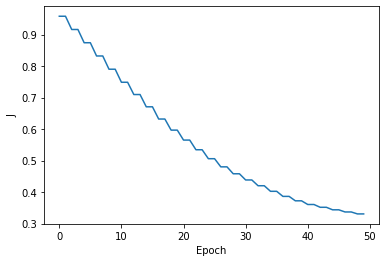

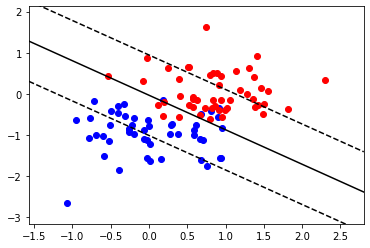

In [ ]:
# Your Hyperparameters
lr = 0.1
lam = 0.001
main(lr, lam)

The learning is much better than what the perceptron performed: when data is mixed like here, it gets difficult for perceptron to converge and find an optimal separator.

# Part 2: SVM Kernel Trick

In the case where the data is linearly inseparable, a linear classifier like the previously described cannot produce a seperator that is capable of classifying the data correctly (see figure below).

One way to overcome this issue, is with the **kernel trick**, which is a data preprocessing approach, to project it onto a different space (of possibly higher dimension), where the data is more likely to be more seperable linearly.

$\Phi(x)$ is the kernel function, and maps the input data $x$ into another state space. 
The following figures are some examples of the kernel trick in action:

<img src="https://vitalflux.com/wp-content/uploads/2020/07/Screenshot-2020-07-14-at-6.22.08-PM.png">

**Figure 3**: In the current one dimensional representation, data is clearly not separable by a hyperplane.

In the example in Figure 3, the data is distributed in a single dimension, and is impossible to seperate it using linear classifier. If we apply the transformation $\Phi(x) = x^2$
as the kernel function, we map the data into a 2D space (Figure 4), where the data can be linearly seperable.

<img src="https://vitalflux.com/wp-content/uploads/2020/07/Screenshot-2020-07-14-at-6.22.19-PM.png">

**Figure 4**: After application of a kernel, the data is represented in a higher dimension. In this case it is visually clear that not it is feasible to linearly separate the points by a hyperplane. 

There is a variety of kernel functions (polynomial, gaussian, RBF, sigmoid, ...) that map the data into different and higher dimensional spaces.

In practice, we test the different kernel functions to see which one performs the best (there is not clear way to dertemin the best kernel function from data). 

Finally, notice that in Figure 3 and Figure 4, it is visually clear that the kernel method application makes the data separable. This is not usually the case (picture the same for 64 dimensions or doing SVM to classify DNA data). Fortunately. we do not have to choose kernels by intuition as there is a whole field of research dedicated to developing a sound theory for this.  We point curious students that want to know more towards the very rich field of study of Kernel Methods.

## Question 3:
We now test the use of a polynomial kernel to make our data linearly separable. First, we define our data to be sampled from a concentric circles of different radius.

- Train the SVM on the data created above :
  - the linear (default) kernel
  - as well as the polynomial kernel.
- Plot the data projected in the polynomial kernel
- Comment the results. 
- Can you think of another Kernel that would be better suited for the type of data (concentric circles)?




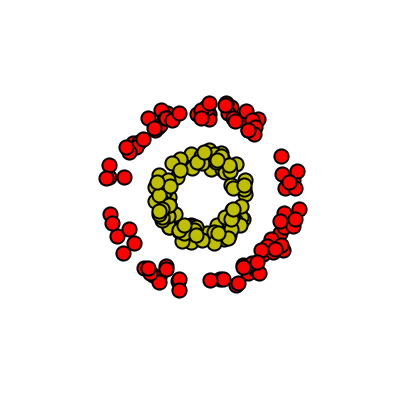

In [ ]:
N = [100,100]

y = np.zeros((1, 200))
y[0, 100:] = 1

theta1 = 2*np.pi*np.random.rand(1,N[1])
r1 = .3 + .2*np.random.rand(1,N[1])
points1 = np.vstack((np.cos(theta1)*r1,np.sin(theta1)*r1))

theta2 = 2*np.pi*np.random.rand(1,N[1])
r2 = .8 + .2*np.random.rand(1,N[1])
points2 = np.vstack((np.cos(theta2)*r2,np.sin(theta2)*r2))

x = np.hstack((points1, points2))

plotp = lambda x,col: plt.scatter(x[0,:], x[1,:], s=200, edgecolors="k", c=col, linewidths=2)

plt.figure(figsize=(7, 7))

plotp(points1, 'y')
plotp(points2, 'r')

plt.axis("off")
plt.xlim(np.min(points2[0,:])-1,np.max(points2[0,:])+1)
plt.ylim(np.min(points2[1,:])-1,np.max(points2[1,:])+1)


plt.show()

In [ ]:
print(f'data shapes : {x.shape}, {y.shape}')

data shapes : (2, 200), (1, 200)


J: 0.9902473774489451 A: 0.555 P: 0.5523809523809524 R: 0.58


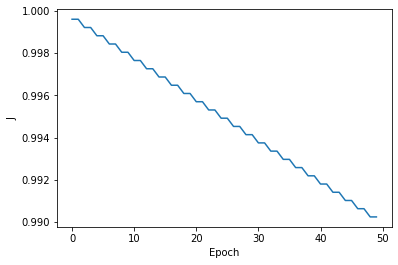

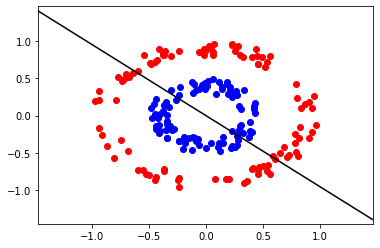

In [ ]:
y[y<0.5] = -np.ones(len(y//2))
X = np.concatenate((np.ones(len(x[0]))[np.newaxis], x), axis=0)
Y = y[0,:]
W, Js = svmTrain(X, Y, lam, lr)
J, A, P, R = svmTest(W, X, Y, lam)
print("J:", J, "A:", A, "P:", P, "R:", R)
plotConvCurve(Js)
plotData(W, X, Y)

We can see the svm linear model does not fit the data at all. The cost decrease is marginal. This model is unrelevant in this case.

Instead, we shoud represent each sample by its euclidian norm (distance from the origin). Plus, another way to show the data is by calculating a polynomial transformation and ploting the division between the classes.

In [ ]:
def plotData3D(W, X, Y):
  """
  Plot the data alongside the decision boundary

  Parameters:
  -----------
  `W` : Trained weights [d x 1]
  `X` : Training and testing inputs [d x N]
  `Y` : Training and testing Labels [1 x N]
    
  """

  x_min = np.min(X[0, :]) - 0.5
  x_max = np.max(X[0, :]) + 0.5
  y_min = np.min(X[1, :]) - 0.5
  y_max = np.max(X[1, :]) + 0.5
  z_min = np.min(X[2, :]) - 0.5
  z_max = np.max(X[2, :]) + 0.5
  
  fig = plt.figure()
  ax  = plt.axes(projection='3d')
  ax.plot3D(X[0, :], X[1, :], X[2, :], 'o')

  #x = np.arange(x_min, x_max, 0.01)
  #y = np.arange(y_min, y_max, 0.01)

  #x, y = np.meshgrid(x, y)

  #if W[3] != 0:
    #z = -x*W[1]/W[3] - y*W[2]/W[3] - W[0]/W[3]
    #ax.plot_surface(x, y, z)
  #else:
    #ax.vlines(0, y_min, y_max)

  #ax.set_zlim(z_min,z_max)
  #ax.set_xlim(x_min, x_max)
  #ax.set_ylim(y_min, y_max)
  
  plt.show()

  return

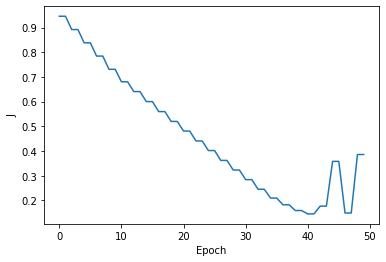

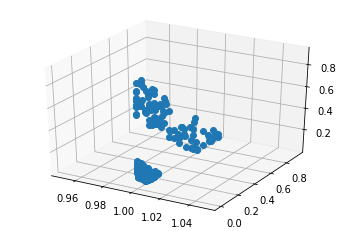

J: 0.38585976599956884 A: 0.955 P: 0.9174311926605505 R: 1.0


In [ ]:
xx = x[0,:]**2
yy = x[1,:]**2 
zz = math.sqrt(2)*x[0,:]*x[1,:] 

XX = np.array([xx, yy, zz])
XX = np.concatenate((np.ones(XX.shape[1])[:,np.newaxis], XX.T), axis=1).T
YY = np.ravel(y.transpose())

lr = 1
lam = 0.001
model = SVC(kernel='poly')
W, Js = svmTrain(XX, YY, lam, lr, W = np.array([0, 0, 0, 0])[:np.newaxis])
plotConvCurve(Js)
plotData3D(W, XX, YY)
J, A, P, R = svmTest(W, XX, YY, lam)
print('J:', J, 'A:', A, 'P:', P, 'R:', R)

As we can see, the polynomial classification gets good results and it separates correctly the two classes.

# Part 3: Breast Cancer Classification
As discussed, kernel methods allow us to apply Machine Learning methods to different domains of research. Here, we will discuss such a case in the medical domain, specifically in the problem of Breast Cancer classification.

## Question 4: 
Train the SVM on the dataset defined below, using the linear, polynomial and a kernel of your choice. Comment the results.

In [ ]:
df = pd.read_csv('./data/tumor.csv')  # import the CSV file
df = df.drop('Sample code number', axis=1)  # Drop the first column

# Separating X, Y
X = df.drop(['Class'], axis=1)
Y = df['Class']

# Scaling the Data
std = StandardScaler()
X = std.fit_transform(X)
Y = np.maximum(Y.to_numpy().reshape((-1, 1)) -3, 0)

# Train-Test Split (80-20)
xTrain, xTest, yTrain, yTest = train_test_split(X, Y, test_size=0.20, random_state=0)

# Rearange and print the data shapes
xTrain, xTest, yTrain, yTest = xTrain.T, xTest.T, yTrain.T, yTest.T
print(f'Training data shapes : {xTrain.shape}, {yTrain.shape}')
print(f'Testing data shapes : {xTest.shape}, {yTest.shape}')

Training data shapes : (9, 546), (1, 546)
Testing data shapes : (9, 137), (1, 137)


In [ ]:
model = SVC(kernel="linear")
model.fit(xTrain.T, yTrain[0,:])
print("F1 score of linear kernel:", f1_score(yTest[0,:], model.predict(xTest.T)))

model = SVC(kernel="poly")
model.fit(xTrain.T, yTrain[0,:])
print("F1 score of polynomial kernel:", f1_score(yTest[0,:], model.predict(xTest.T)))

model = SVC(kernel="rbf")
model.fit(xTrain.T, yTrain[0,:])
print("F1 score of rbf kernel:", f1_score(yTest[0,:], model.predict(xTest.T)))

F1 score of linear kernel: 0.9411764705882353
F1 score of polynomial kernel: 0.9148936170212766
F1 score of rbf kernel: 0.9423076923076924


We can see our svm model is very relevant to predict tumors. Furthermore, the linear kernel is very efficient, which means our data is by itself virtually linearly separable, without adding a change of dimensions. Polynomial kernel is less efficient, probably because of some overfitting problem.

## References:
- Chapter 15 of the book : Understanding Machine Learning
- SVM Kernel Trick Example : https://vitalflux.com/machine-learning-svm-kernel-trick-example/
- SVM Course YouTube Playlist (Chapter 12) : https://www.youtube.com/playlist?list=PLLssT5z_DsK-h9vYZkQkYNWcItqhlRJLN

## Aditional References:


*   [Perceptron vs SVM: a quick comparison](https://medium.com/@subashkharel/perceptron-vs-svm-a-quick-comparison-6b5d6b5d64f#:~:text=Perceptron%20stops%20after%20it%20classifies,be%20classified%20with%20more%20confidence.)
*   [Support vector machine](https://en.wikipedia.org/wiki/Support_vector_machine#math_1)

